# Spotify Popularity Prediction Model


**Author**: Oun Nuqul

**Contact**: oun.nuqul@gmail.com

**Date**: April 11th 2023

___

## Table of Contents

1. Introduction to the Project
    - Introducing this Notebook
2. Exploration of Kaggle Dataset
    - Data Dictionary
3. Preparing for New Data Pull
    - Defining Functions
    - Setting Up Spotipy
    - Getting New Genres
    - Getting Ids for New Genre Track Seeds
    - Concatenating All Track Seeds to Single DataFrame
4. Pulling the New Data
    - The Meta Data
    - Structuring the Meta Data
    - The Audio Features
5. Conclusion to this Notebook

___

## Introduction to the Project

The way people consume music has changed drastically in the passed few decades, transforming from a selling industry to a streaming industry. A indisputable giant of this industry is the platform Spotify, which was seeing as many as 100,000 new additions to its catalog daily at the end of 2022. From the perspective of artists, the growing nature of the industry is foreshadowing greater opportunities, as well greater competition. For that reason the ability to make data driven decisions has become invaluable and essential for any artists hoping to find success on a platform which is slowly becoming oversaturated with content. This project will start by taking a look at a dataset found on Kaggle that was sourced directly from the Spotify API. Using this dataset we can explore and process the data and attempt fitting a classification model that can predict whether a track is popular or not given a set of features.

### Introducing this notebook

This notebook will start with an initial exploration How to Spotify data sets found on Kaggle. After exploring the significance of the features available we will move on to pulling a fresh and more balanced dataset directly from the Spotify API. The reason for this is because upon initial examination of the Kaggle page it seems that the data set was pulled with certain specifications in mind that end up making it problematic for fitting a model.

## Exploration of Kaggle Dataset

In [1]:
import pandas as pd #importing pandas
import numpy as np #importing numpy
import time #importing time
from tqdm.notebook import tqdm #importing tqdm
import matplotlib.pyplot as plt #importing matplotlib
import pickle #importing pickle

In [2]:
#reading the kaggle dataset
df_kaggle = pd.read_csv('Data/kaggle_dataset.csv',index_col=0)

In [3]:
#taking a first look
df_kaggle.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
#taking a look at the structure of the dataset
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

Taking a look at the dataset we can see that it consists of 114,000 rows, and 20 features. Each row of the dataset is a single track of music. The features consist of mostly numeric data that refers to technical / musical details of that track, as well as categorical data which represents information on that track such as a unique identifier and details about the track and artist. 

### Data Dictionary

**Object Type**:
- `track_id`: A string type feature that serves as a unique identifier for each track.
- `artists`: The artist / artists that released the track.
- `album_name`: The album name of the album that the track belongs to.
- `track_name`: The name of the track.
- `track_genre`: The genre that the track belongs to.

**Boolean Type**:
- `explicit`: Whether the track contains explicit content or not.

**Numeric Type**:
- `duration_ms`: The duration of the track in milliseconds.
- `danceability`: A value from 0.0 to 1.0 that describes how suitable the track is for dancing.
- `energy`: A value from 0.0 to 1.0 that describes how intense and energetic that track feels.
- `key`: A value from 1 to 11 that describes the key that track is in (C = 0, C# = 1, ..., B = 11).
- `loudness`: A value less than 0 the describes how loud the track is in decibels.
- `mode`: A binary value that describes whether the song is in a major or minor key (Major = 1, Minor = 0).
- `speechiness`: A value from 0.0 to 1.0 that describes how evident spoken word is on the track (1 is closer to podcasts, while around 0.3 is music with few lyrics)
- `acousticness`: A value from 0.0 to 1.0 that describes how acoustic the track is.
- `instrumentalness`: A value from 0.0 to 1.0 that describes how instrumental the track (Completely instrument = 1)
- `liveness`: A value from 0.0 to 1.0 that describes how probable the track was recorded while be preformed live.
- `valence`: A value from 0.0 to 1.0 that describes the type of emotion the track portrays (1 = Positive emotions, 0 = Negative emotions)
- `tempo`: An overall estimate of the tracks tempo measured in beats per minute (BPM)
- `time_signature`: The time signature of the track with values between 3 to 7 (translated to 3/4 to 7/4)
- `popularity`: The popularity of a track is a value from 0 to 100 which is calculated by Spotify using an algorithm that takes into account the number of streams that track has, as well as how recent and repeated those streams were.

In [5]:
#checking the distribution of the dataset
df_kaggle.groupby('track_genre')['track_id'].count()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: track_id, Length: 114, dtype: int64

It looks like the dataset was pulled with the intention of getting an even spread of songs from each genre.
The data consists of 114 genres, with 1000 tracks for each of them. At first this seems desirable as no one genre is over represented, and thus a classification model would prove more effective. However, given that the `popularity` feature is to be the target variable to classify its distribution is far more important.

In [6]:
#A breakdown of the popularity features distribution
df_kaggle['popularity'].describe()

count    114000.000000
mean         33.238535
std          22.305078
min           0.000000
25%          17.000000
50%          35.000000
75%          50.000000
max         100.000000
Name: popularity, dtype: float64

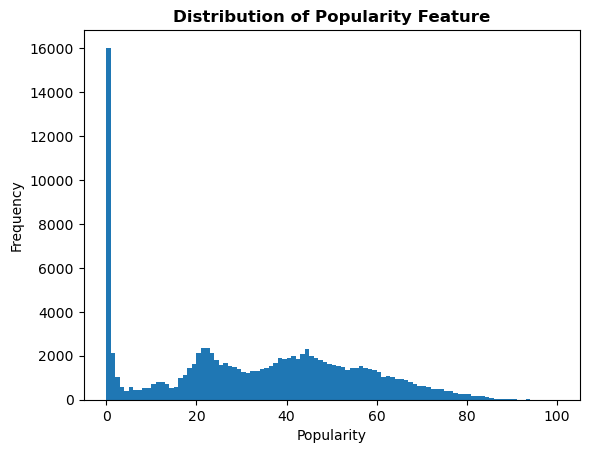

In [7]:
plt.figure()
plt.hist(df_kaggle['popularity'], bins=100)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Feature', fontweight='bold')
plt.show()

Even though the range of values for the `popularity` feature reaches 100, the dataset is very imbalanced and consists of mostly of 0 values. Out of 114,000 tracks about 16,000 of them have a popularity value of zero, which is about 14% of the data. This proves very problematic as all models would have a difficult time predicting anything other than a zero has that is the most predominant value. Thus the needs for a new dataset became evident. However, the kaggle data set was not completely useless and would prove helpful when pulling the new data. 

## Preparing for New Data Pull

To use the Spotify API with python, the use of an existing package is necessary. Spotipy is a library of commands that allows for both building third-party applications that work with Spotify, as well as pulling data. 

After going through the documentation of the Spotify API, certain essential concepts came to light. Data pulled from the API is returned in the form of JSON files, which are essentially dictionary embedded into each other, with each dictionary containing different information. 

By creating a developer account for the platform, we can get credentials that allow us to begin making use of the API.

### Defining Functions

In order to make the best use of the API, defining a few functions would prove beneficial.

Working with APIs comes with a certain limitations, of which are rate limits that limit the amount of requests a script can make of the API in a certain time period. In the case of Spotipy, only a finite number of requests can be made in a 30 second window. For that reason certain functions need to be defined in order to account for that.

In [8]:
#Defining call/backoff strategy that accounts for rate limits
def call_with_retry(func, max_retries=3, initial_delay=1, backoff_factor=2):
    '''
    This function takes in a function 'func' and attempts to call it with a retry mechanism.
    The function will retry the call up to 'max_retries' times, with a delay of 'initial_delay'
    seconds between retries that increases by a factor of 'backoff_factor' after each retry.
    
    - func: the function to be called with retry mechanism
    - max_retries: the maximum number of retries to attempt (default=3)
    - initial_delay: the initial delay (in seconds) between retries (default=1)
    - backoff_factor: the factor by which the delay should be increased after each retry (default=2)
    '''
    
    retries = 0
    delay = initial_delay
    
    while retries < max_retries:
        try:
            result = func
            return result
        except spotipy.client.SpotifyException as e:
            if e.http_status == 429: # Error 429 is what Spotipy returns when the rate limit is exceeded
                print(f"Rate limited. Retrying in {delay} seconds...")
                time.sleep(delay)
                delay *= backoff_factor
                retries += 1
            else:
                raise e
    
    # Max retries reached
    print("Max retries reached. Giving up.")
    return None

The dataset found on Kaggle which contains both metadata about the tracks as well as audio features about those same tracks Was actually due to pull from two separate places. So, in order to pull the same type of data From the API two separate functions need to be defined in order to pull both of those kinds of data.  

In [9]:
# Defining function to retrieve track metadata in chunks of 50 tracks
def get_tracks(ids):
    '''
    This function takes in a list of track IDs 'ids' and retrieves metadata for each track using the
    'tracks' method of the Spotify API. The function retrieves metadata for up to 50 tracks at a time,
    with a progress bar displayed using the 'tqdm' library.

    The 'call_with_retry' function is used to handle any rate limiting errors that may occur during
    the API call.
    
    - ids: a list of track IDs for which metadata should be retrieved
    '''
    tracks = []
    for i in tqdm(range(0, len(ids), 50)):
        chunk = ids[i:i+50]
        results = call_with_retry(sp.tracks(chunk))
        tracks += results['tracks']
    return tracks

In [10]:
# Defining function to retrieve track audio features in chunks of 50 tracks
def get_audio_features(ids):
    '''
    This function takes in a list of track IDs 'ids' and retrieves audio features for each track
    using the 'audio_features' method of the Spotify API. The function retrieves audio features 
    for up to 50 tracks at a time, with a progress bar displayed using the 'tqdm' library.

    The 'call_with_retry' function is used to handle any rate limiting errors that may occur
    during the API call.
    
    - ids: a list of track IDs for which audio features should be retrieved
    '''
    audio_features = []
    for i in tqdm(range(0, len(ids), 50)):
        chunk = ids[i:i+50]
        results = call_with_retry(sp.audio_features(chunk))
        audio_features += results
    return audio_features

Note that tracks and audio features are being pulled in increments of 50 as instructed by the Spotipy documentation. This is a feature provided by the API so that chunks of data can be pulled simultaneously such that the rate limit doesn't impose too much of an issue.

Now that we have functions that can pull tracks from the API using unique track ids, we now need A function that can pull random tracks that follow certain specifications. This can be done using the API's recommendations function.

In [11]:
# Defining a function to retrieve recommendations in chunks of 50 tracks
def get_recommendations(params):
    '''
    This function takes in a dictionary of parameters 'params' and retrieves a list
    of recommended tracks using the 'recommendations' method of the Spotify API.

    The 'call_with_retry' function is used to handle any rate limiting errors that
    may occur during the API call.
    
    Parameters have minimum requirement of including at least three track seeds, a genre seed,
    as well has some suplementry filters such as ranges for popularity values.
    
    sample params variable:
        params = {
            "limit": 100, # number of recommendations to return
            "seed_tracks": [], # list of seed track ids to base recommendations on
            "min_popularity": 80, # minimum popularity score for recommended tracks
            'max_popularity': 90, # max  popularity score for recommended trac
            "seed_genre": ['hip-hop'] # list of genre seeds to base recommendations on
            }
    '''
    recommendations = []
        
    results = call_with_retry(sp.recommendations(**params))
    recommendations += results['tracks']
    
    return recommendations

Lastly, we need a function that can pull a somewhat balanced selection of track IDs from the existing Kaggle dataset. The function will try to select a track ID for each genre for each popularity bracket (0 - 20, 20 - 40, 40 - 60, 60 - 80, 80 - 100).

In [12]:
def get_track_seeds(df, pop_bracket=None, genre=None):
    '''
    This recursive function returns a dictionary of genres with a list of five track IDs from various popularity 
    brackets from the df. The function works by Looping through each genre in the dataset, and then each 
    popularity bracket, attempting to pull an ID with those specifications.
    
    When pop_bracket and genre are at the default value (None), then all possible genres and popularity brackets
    will be searched. But if those parameters are defined, then only one entry will be pulled with those specific
    values. 
    
    At any point where no entry exists that follows the specified parameters, an entry from the lower popularity
    bracket will try to be pulled. This function does this by calling itself with adjusted parameters.
    '''
    final_d = {}
    popularity_brackets = [(80, 100), (60, 80), (40, 60), (20, 40), (0, 20)]
    
    #the case where all popularity brackets are to be checked
    if pop_bracket is None and genre is None: 
        
        #looping through all posible genres
        for gen in df['track_genre'].unique():
            final_d[gen] = []
            
            #looping through all possible popularity brackets
            for i, (start, end) in enumerate(popularity_brackets):
                
                #checks if a track of those specifications exists
                if df[(df['track_genre'] == gen) & (df['popularity'] > start) & (df['popularity'] <= end)].shape[0] > 0: 
                    
                    #appends the track id to a list for that genre inside the final dictionary 
                    final_d[gen].append(str(df[(df['track_genre'] == gen) &
                                             (df['popularity'] > start) &
                                             (df['popularity'] <= end)].sample(1)['track_id'].to_list()[0]))
                
                #recursively calling the same function at a lower popularity bracket
                else: 
                    final_d[gen].append(get_track_seeds(df,(start - 20, end - 20), gen))
    
    #this case is only used when the function calls itself to find a specific singular track id
    else: 
        
        #checks if a track of those specifications exists
        if df[(df['track_genre'] == genre) & (df['popularity'] > pop_bracket[0]) & (df['popularity'] <= pop_bracket[1])].shape[0] > 0:
            return str(df[(df['track_genre'] == genre) &
                          (df['popularity'] > pop_bracket[0]) &
                          (df['popularity'] <= pop_bracket[1])].sample(1)['track_id'].to_list()[0])
        else:
        # if no tracks exist in that popularity bracket either, the next lower one is checked also as long as a lower bracket exists.
            if pop_bracket[0] > 0:
                return get_track_seeds(df, (pop_bracket[0] - 20, pop_bracket[1] - 20), genre)
            else:
        # if no songs of these specfication is found then None will be returned so that the function can move on to the next combination of specfications.
                return None
        
    return final_d

**Note: The function assumes that the inputed df follows the format of the Kaggle dataset used at the start of the notebook. **

### Setting Up Spotipy

First we need to define the client_id and client_secret to use as credentials.

In [13]:
#credential for using spoitpy (no longer active)
client_id = '1b0f76afafac4d4898811b950e1a0c08'
client_secret = '806820e9d6004f7c94723ef175ee547c'

In [14]:
#importing spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Set up Spotipy client
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Once the spotipy object `sp` is instantiated we then gain access to the spotipy functions.

### Getting New Genres

Since it was previously established that the initial data set wasn't balanced, it becomes necessary to check if there were any other missights. Something to check is there are any other genres available. 

In [15]:
# Checking if there are any genres that the API has that arent in the intial data set
new_genres = []
for gen in list(sp.recommendation_genre_seeds()['genres']):
    if gen not in list(df_kaggle['track_genre'].unique()):
        new_genres.append(gen)

In [16]:
print(new_genres)
print('\n')
print('Number of genres:', len(new_genres))

['bossanova', 'holidays', 'metal-misc', 'movies', 'new-release', 'philippines-opm', 'post-dubstep', 'rainy-day', 'road-trip', 'soundtracks', 'summer', 'work-out']


Number of genres: 12


It seems that there are 12 more genres available. Finding seed track ids for them using the API would likely be difficult, but there is a simpler option. Using the actual Spotify app, and Spotify's curated playlists I was able to find a few tracks that fit into 9 of the 12 new genres. These tracks were manually selected and saved in the form of .csv file *(Data/tracks_from_new_genres.csv)*

In [17]:
# reading the tracks from new genres
df_new_tracks = pd.read_csv('Data/tracks_from_new_genres.csv', index_col=0)
df_new_tracks.sample(8)

,name,artist,genre
38,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,summer
11,We Own It (Fast & Furious),2 Chainz,movies
18,Kung Wala Ka,Hale,philippines-opm
16,Wag Na Lang,MC Einstein,philippines-opm
3,Fotografia,Elis Regina,bossanova
41,Miracle (with Ellie Goulding),Calvin Harris,work-out
9,Frosty The Snowman - Remastered 2006,Bing Crosby,holidays
19,Miloves (Otw Sayo),King Badger,philippines-opm


### Getting Ids for New Genre Track Seeds

Using the sp.search() function from the Spotipy library and some clever string parsing we can find the track ids corresponding to the new genre tracks as to use them as track id seeds when pulling the new dataset.

In [18]:
#creating a dictionary to store the track ids for each new track seed in its respective genre list
new_gen_track_seeds = {}
for gen in df_new_tracks['genre'].unique():
    new_gen_track_seeds[gen] = []

#searching 
for i in range(df_new_tracks.shape[0]):
    query = 'track:' + str(df_new_tracks['name'][i]) + ' artist:' + str(df_new_tracks['name'][i])
    new_gen_track_seeds[df_new_tracks['genre'][i]].append(sp.search(q=query, type="track")['tracks']['items'][0]['id'])

In [20]:
#formatting the trackseeds into a dataframe
track_seeds_new = pd.DataFrame(new_gen_track_seeds)

In [21]:
#checking the new track seeds
track_seeds_new.head()

,bossanova,holidays,movies,philippines-opm,post-dubstep,rainy-day,road-trip,summer,work-out
0,2gHQYQuoGGjpa6I1Km5kSh,6pVW5LRWgeLaHudxauOTJU,60nZcImufyMA1MKQY3dcCH,3h8uWt8HNyDNubPSEBgTPG,79pWgbXGSFEFOx2TGufW1b,7BSMSvK0WxrDeI98bswYa8,1jDJFeK9x3OZboIAHsY9k2,5YbPxJwPfrj7uswNwoF1pJ,57BGVV6wcyhbn3hsjlqEZB
1,5TUmfePkCdoSYSavOykhau,4SEam9rj61jkW7POxrdDHo,00QyLmjxaSEE8qIZQjBXBj,4Qs3DkTFVG1QiOwd0BUa9o,4AEAAygqwCYcksy5hwdZw7,4FxBG9VPpxPXMDgqLgW5ZD,6gXrEUzibufX9xYPk3HD5p,3GZD6HmiNUhxXYf8Gch723,5eTaQYBE1yrActixMAeLcZ
2,1cCKsJZbWUZbAkdrn2qviQ,0bYg9bo50gSsH3LtXe2SQn,0qcr5FMsEO85NAQjrlDRKo,6bMSUhAmaAGTb5RTTuzWE3,33IaAQxnG3sCAlxzWZdx7c,6Vejmu5dz6MMOnn2pIko9q,7b4yGtR0rujvLi5EBfKKJ2,1zi7xx7UVEFkmKfv06H8x0,0bNsRYvrZokG8s7rfK3LS4
3,4O2tMlIxlgRwmNQDElwIq4,1dtIaSlyrLI04sqYa8nLyN,1n8NKQRg8LVHy7oUhUgbFF,4he4CYDhvSPTxQc0e0Le1L,1hmwBh0zftM6KNB2XWlTCt,6If4a7ytTXliui3vJVi9px,18AXbzPzBS8Y3AkgSxzJPb,3KkXRkHbMCARz0aVfEt68P,722tgOgdIbNe3BEyLnejw4
4,7IdImuc0c87w4tOzNDf3Sj,35MqcEIVZ7svbBpRt4N30g,2TZbQZXOuR8osP2AK8yYMN,44jJiCwGdnqqCkgqlvCIdp,5KOTUgeeceKkLIb4zBTe7x,65q0qZbQBdPPYfAcZ7n0e3,1fDsrQ23eTAVFElUMaf38X,5r5cp9IpziiIsR6b93vcnQ,3bidbhpOYeV4knp8AIu8Xn


### Concatenating All Track Seeds to Single DataFrame

The last step of preparation for the data pull is to concatenate all the track seeds into a single dataframe so that when pulling the data iterating through all the seeds is simpler and more straight-forward.

In [22]:
#selecting the track seeds for the initial 114 genres using the defined function
track_seeds_1 = pd.DataFrame(get_track_seeds(df_kaggle))

In [24]:
track_seeds_1.head()

,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,brazil,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
0,5vjLSffimiIP26QG5WcN2K,1RIhd7jjWDQwSKsbxxGArN,3ZOEytgrvLwQaqXreDs2Jx,31AOj9sFz2gM0O3hMARRBx,0yc6Gst2xkRu0eMLeRMGCX,3khEEPRyBeOUabbmOPJzAG,7xNQMlboWKQvUzI1FxG6Cs,11TmWrHkxwtVcCtEdAXjJA,3dPQuX8Gs42Y7b454ybpMR,6GomT970rCOkKAyyrwJeZi,...,4OwhwvKESFtuu06dTgct7i,55ZUuMlOTxhJiLs3LkIqZH,3vkQ5DAB1qQMYO4Mr9zJN6,1TfqLAPs4K3s2rJMoCokcS,1jSiCrX3a7ie9Okck6lL1R,2vXKRlJBXyOcvZYTdNeckS,0bI7K9Becu2dtXK1Q3cZNB,6T10XPeC9X5xEaD6tMcK6M,46xC5pDq9vxl4JcHkb1QkX,1O6OPFAXdTdjHtT7Z2Hlt8
1,0IktbUcnAGrvD03AWnz3Q8,2Y3x5VcEAxLNmVHxQOE0jB,51c94ac31swyDQj9B3Lzs3,5anCkDvJ17aznvK5TED5uo,1A8qD0Ygjzsby5OmXh1PTa,7CSTVNXkW2AbmNktlP1hi2,50dpeks48j0zMECIKVAGUG,2oeEe3EdRBaUPRHmIbgQLU,3MJov5mT64K42o1Rffhblq,5GCz9BOkt17aI6ZOR3EiUl,...,42VgiRyg0YjtRVLiPFNxPJ,6iEEf0a4KOHbOsbJ4TslLY,71BJVUm9wse1WBFEGHIFsI,4sscDOZCkbLSlDqcCgUJnX,1jSiCrX3a7ie9Okck6lL1R,74PyndGWYtfs86n60lAsYW,5l4DU5tgUtLqFSxir6y0dp,7uv632EkfwYhXoqf8rhYrg,6g6MHm9u0h2Em9Xuk89eqR,524KQvc46Y1X6HRomMKoBJ
2,5fTJGZ6k0zokfh5KLfe0sm,6K8y9WcUbgv0j7RGceHvym,7rVJVRNCAJkoQ2ta6E9fY2,6A6PDawvZIfnJHW40sBHzz,2ozeCscFSmHW7FKLSTJlA4,3xGTUo0WtGSwCSxLIhCn0r,2956v4MaiU78SkPpeTXxhq,3d8oIEIdoU2ZWVmiGvdGCE,3giA44zxPL9lXeYhzdcMpX,7gsWcwi6Y1hj2WSNxnm12K,...,21kzkYl2j4Sq89FCj9HrqF,2WIkgLazRptoY6fxVmhoGA,3UmmyFRWJq42Hrj3N0uwaS,3jl1I9gvCXo5V9hu4hYGLY,3mGkPsZbHEBf8ZT1ExZnww,49tMnLt1iXNT6QBOsepFyg,3GYH6TqF2fIihKps1Sedxc,2Yz2Z1ENB85nYrK3Rg2qxO,4DA5sNDdnpku4K6URoi0Ku,1qxDqbzmWODOkr0Ja5Iotz
3,2zfmrdj03N55KX9epHrTg7,43368zd7iBhYvS721LOYDE,3eHYnUFpEZjnTQag1EVxHC,7aQvOqPkqGbug8TnMz3jxo,7lAruwEkie4qgyt0LNvUtL,6weLJLjwiXBRgMj4XtnSsf,3pJIlfJpdSYDSjjs5tVWSZ,7fJcX4n3jrr2Nd2oB6VnUd,110pEfj2ij3wmN7Cs9RG7D,6IzjGEM0s8Q3avi1DHc5Fc,...,3mN7adOOcExo8nb7Li8Tmc,0JCerv0mCCyf5IBIny6sYh,0Pft93lucdP9MiiWYQBSfw,6sXtdCMxgpmRVctBlYgWLu,3XtIOnKLnyfHeklaBKwIlp,5Kxk0Jj1oMhMNw3xzt6wr1,7E25uFkj24ZY9V4YI5o1qK,5bUeN1bZKkmP4SJb0aft8B,0NoGNBOL1IxYIWWcZBad6q,0jwJrWjeJLF9KmvVh5cYDc
4,2kMrCPZ0o5gErBPLCRgoli,7HuER5q1a5dJ0uKrfGrMCj,42Jkqzhm5Y7ab7f1d22GTq,4U1WGnRxI57j3Ebi9A3HtD,4ztaiZfY9lPy1ItQ3DoRiT,5IhAZmgprQOF7yeEe0faOE,79u7sIEIYPZ549jpH9FggZ,0tyhL8tIivPgkpBeUdY9jP,5g9aRY6CDZx8KOwahk0DjC,5dva7BVCxokQMBpa6c3iBi,...,2UFAjlh6NmjWX9IyMTMcxD,5TQuz8e5Jzjo4MR2y6pBtz,61kw5WDLBTr1m2Fe5xjB01,700D6C7VLoFuEuv1oDbd7A,7qdx4UFe97R1fsiHIUmaVv,6UpWvIIiycdBPMSjGJHNEg,6G6aJKF6u2NiA3hiY08yAQ,041Xf2o8yDouqWCDKqkGuC,5ol1YlrXJABoBwbZ4tNfQt,7GwYyLNFyAsSsmt2aa0z6u


Next we need to concatenate that dataframe, with the dataframe of track seeds for the 9 new genres.

In [25]:
track_seeds = pd.concat([track_seeds_1, track_seeds_new], axis = 1)

In [26]:
#checking that all desired gernes are included
list(track_seeds.columns) == list(track_seeds_1.columns) + list(track_seeds_new.columns) 

True

In [27]:
#saving the final df of track seeds
track_seeds.to_csv('Data/final_track_seeds.csv')

## Pulling the New Data

Since everything is prepared now, we can now pull the new data and format it into a more useful structure.

### The Meta Data

In [28]:
#defining the dictionary that will store the pulled json files
pulled_jsons = {}

#looping through every desired genre
for gen in tqdm(track_seeds.keys()):
    
    #making a seperate list for each genre to be pulled
    pulled_jsons[gen] = []
    
    #looping through every popularity range (ranges of 10 eg. 10 - 20, 20 - 30, ...)
    for x in range(0,100,10):
        params = {
        "limit": 100, # number of recommendations to return (the max limit is 100)
        "seed_tracks": list(track_seeds[gen]), # list of seed tracks to base recommendations on
        "min_popularity": 90 - x, # minimum popularity score for recommended tracks
        'max_popularity': 100 - x, # maximum popularity score for recommended tracks
        "seed_genre": [gen] # the genre seeds to make recommendation from 
        }
        
        #storing the pulled tracks into their respective genre lists in the disctionary
        pulled_jsons[gen].append(get_recommendations(params))

  0%|          | 0/123 [00:00<?, ?it/s]

The truth is that it is unlikely to find 100 tracks for each popularity bracket of each genre. Not because those tracks don't exist, but because those tracks might only be recommended by the API with a very different set of parameters. It's actually very likely that a few popularity brackets in every genre will have less than 100 tracks, and that a few brackets might have no tracks. 

In [29]:
#showing that not every popularity bracket of every genre will contain tracks
len(pulled_jsons['acoustic'][0])

0

As shown in the cell above, there were no acoustic tracks pulled in the highest popularity bracket (90 - 100).

The structure of the pulled_jsons dictionary looks like this:
- Genre:
    - list of tracks in popularity brackets:
        - list of tracks for each popularity bracket
            - track object:
                - `'album'`: album object
                    - `'release_date'`: the release date of the album
                    - `'album_name'`: the name of the album
                - `'artists'`: artists object
                    - `'name'`: a list of strings that identify the artist / artists credited on the track
                - `'available_markets'`: list of available markets
                - `'disc_number'`: disc number of  where the track exists on the album
                - `'duration_ms'`: duration in milliseconds
                - `'explicit'`: whether the track has explicit content
                - `'external_ids'`: external_ids dictionary
                - `'external_urls'`: external_urls dictionary 
                - `'href'`: the URL of the track on the actual Spotify app
                - `'id'`: the track_id
                - `'is_local'`: If the track is available locally on a device
                - `'name'`: The name of the track
                - `'popularity'`: The popularity score of the track
                - `'preview_url'`: A URL for a 25 second preview of the track 
                - `'track_number'`: The track number for its respective album  
                - `'type'`: The data type of the object being pulled 
                - `'uri'`: an internal identifier used by spotify
                
    

In [30]:
#showing the structure of the track object
pulled_jsons['acoustic'][2][3].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

We can see that there are some features that we've seen before in the Kaggle dataset, but also a few features that we haven't seen before. There are also some features in the kaggle dataset (the audio features) that aren't in this first data pull. Those audio features will be pulled separately.

### Structuring the Meta Data

Seeing as the tracks' meta data that was pulled isn't in a very useful format, it needs to restructured so that it can be put into a dataframe.

In [31]:
#instantiating a dictionary to store the specfic data from the pulled_jsons dictionary
pulled_tracks_dict = {}

#creating an empty list for each of the values that are going to be formatted into the dataframe
pulled_tracks_dict['track_id'] = []
pulled_tracks_dict['artists'] = []
pulled_tracks_dict['album_name'] = []
pulled_tracks_dict['track_name'] = []
pulled_tracks_dict['popularity'] = []
pulled_tracks_dict['duration_ms'] = []
pulled_tracks_dict['explicit'] = []
pulled_tracks_dict['track_genre'] = []
pulled_tracks_dict['release_date'] = []
pulled_tracks_dict['preview_url'] = []

#creating empty lists for the values that we aren't very interested in 
pulled_tracks_dict['available_markets'] = []
pulled_tracks_dict['disc_number'] = []
pulled_tracks_dict['external_ids'] = []
pulled_tracks_dict['external_urls'] = []
pulled_tracks_dict['href'] = []
pulled_tracks_dict['is_local'] = []
pulled_tracks_dict['track_number'] = []
pulled_tracks_dict['type'] = []
pulled_tracks_dict['uri'] = []

In [32]:
#looping over all the json files in the pulled_jsons file and storing them into the pulled_tracks_dict dictionary
for gen in tqdm(pulled_jsons.keys()):
    for popularity_bracket in pulled_jsons[gen]:
        for track in popularity_bracket:
            for col in track.keys():
                
                #getting the album name and release date from the album object
                if col == 'album':
                    pulled_tracks_dict['album_name'].append(track[col]['name'])
                    pulled_tracks_dict['release_date'].append(track[col]['release_date'])
                
                #getting the track_id 
                elif col == 'id':
                    pulled_tracks_dict['track_id'].append(track[col])
                
                #getting the artist / artists names
                elif col == 'artists':
                    temp_s = ''
                    # if multiple artists are credited on the track they will be stored as a single comma seperated string
                    for c in track[col]:
                        temp_s += c['name']
                        if len(track[col]) > 1:
                            temp_s += ', '
                    pulled_tracks_dict['artists'].append(temp_s)
                
                #getting the track name    
                elif col == 'name':
                    pulled_tracks_dict['track_name'].append(track[col])
                #    
                else:
                    pulled_tracks_dict[col].append(track[col])
            pulled_tracks_dict['track_genre'].append(gen)

  0%|          | 0/123 [00:00<?, ?it/s]

Now that all the data is placed into the pulled_tracks_dict dictionary in an organized fashion, we can transform it all into a dataframe and drop the columns we have no interest in.

In [33]:
df_metadata = pd.DataFrame(pulled_tracks_dict).drop(columns=['available_markets','is_local','track_number','uri',
                                                             'type', 'external_urls','external_ids', 'disc_number',
                                                             'href'])

In [35]:
#sanity check
df_metadata.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,track_genre,release_date,preview_url
0,5CZ40GBx1sQ9agT82CLQCT,Olivia Rodrigo,SOUR,traitor,85,229226,False,acoustic,2021-05-21,None
1,03V5hhD1z7CD41Dy4ZVthN,JJ Heller,Even Here,Even Here,35,248253,False,acoustic,2019-10-04,https://p.scdn.co/mp3-preview/19209115f0aa0b92...
2,20aW5uLdlOuleBQ5RTcSQb,Casey Breves,I'll Sing to You,I'll Sing to You,30,242173,False,acoustic,2017-11-10,https://p.scdn.co/mp3-preview/e7eda7988fbdecfd...
3,66iAV4LVKYYoxVeYoC8M3s,Hayd,I Fall Apart,I Fall Apart,40,240000,False,acoustic,2019-09-13,https://p.scdn.co/mp3-preview/ad4cba4f08444f52...
4,0oCAVym9c3xbXmeFHN6nUR,Front Porch Step,Aware,Lullaby,31,168250,False,acoustic,2013-11-12,https://p.scdn.co/mp3-preview/a0b9af0c08a6b332...


### The Audio Features

Now that we've pulled the meta data for the tracks, all thats left is to pull the audio features using the track_ids.

In [36]:
#using the predefined get_audio_features() with track_ids of the pulled meta data
pulled_audio_features = get_audio_features(df_metadata['track_id'].tolist())

  0%|          | 0/1318 [00:00<?, ?it/s]

In [37]:
#making sure audio features for each track were pulled
len(pulled_audio_features) == df_metadata.shape[0]

True

The pulled_audio_features list contains dictionaries of the audio features for each track. The structure of the dictionaries are:
- `'danceability'`
- `'energy'`
- `'key'`
- `'loudness'`
- `'mode'`
- `'speechiness'`
- `'acousticness'`
- `'instrumentalness'`
- `'liveness'`
- `'valence'`
- `'tempo'`
- `'type'`
- `'id'`
- `'uri'`
- `'track_href'`
- `'analysis_url'`
- `'duration_ms'`
- `'time_signature'`

In [38]:
#showing the types of values available in each audio feature dict
pulled_audio_features[0].keys()

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

Since the audio features are stored in a more structured way, there is no need to hard code a dictionary full of empty lists for each feature. A simple for loop can set it up for us.

In [39]:
#creating a dictionary to store all pulled audio features
formatted_audio_features = {}
for x in pulled_audio_features[0].keys():
    formatted_audio_features[x] = []

And another simple for loop can put all those values into the dictionary.

In [40]:
#looping through every index in the list of audio feature dictionaries
for i in tqdm(range(len(pulled_audio_features))):
    
    #checks if that item in the list is not None
    if pulled_audio_features[i] is not None:
        
        #looping through all the audio features
        for feature in formatted_audio_features.keys():
            
            #storing None values as np.nan to make processing data simpler later
            if pulled_audio_features[i][feature] is None:
                formatted_audio_features[feature].append(np.nan)
            else:
                formatted_audio_features[feature].append(pulled_audio_features[i][feature])

  0%|          | 0/65871 [00:00<?, ?it/s]

The for loop thats storing the audio features into an organized dictionary accounts for None values, such that if a None value occurs the length of each list in the dictionary remains the same, and it can still be transformed into a dataframe.

In [41]:
df_audio_features = pd.DataFrame(formatted_audio_features)

In [42]:
df_audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.380,0.339,3,-7.885,1,0.0338,0.691,0.000000,0.120,0.0849,100.607,audio_features,5CZ40GBx1sQ9agT82CLQCT,spotify:track:5CZ40GBx1sQ9agT82CLQCT,https://api.spotify.com/v1/tracks/5CZ40GBx1sQ9...,https://api.spotify.com/v1/audio-analysis/5CZ4...,229227,4
1,0.349,0.225,0,-10.705,1,0.0342,0.934,0.000016,0.111,0.2370,169.855,audio_features,03V5hhD1z7CD41Dy4ZVthN,spotify:track:03V5hhD1z7CD41Dy4ZVthN,https://api.spotify.com/v1/tracks/03V5hhD1z7CD...,https://api.spotify.com/v1/audio-analysis/03V5...,248253,4
2,0.489,0.176,7,-12.485,1,0.0346,0.868,0.000000,0.117,0.3800,137.590,audio_features,20aW5uLdlOuleBQ5RTcSQb,spotify:track:20aW5uLdlOuleBQ5RTcSQb,https://api.spotify.com/v1/tracks/20aW5uLdlOul...,https://api.spotify.com/v1/audio-analysis/20aW...,242174,4
3,0.634,0.199,10,-16.097,1,0.0403,0.863,0.000086,0.287,0.1690,128.024,audio_features,66iAV4LVKYYoxVeYoC8M3s,spotify:track:66iAV4LVKYYoxVeYoC8M3s,https://api.spotify.com/v1/tracks/66iAV4LVKYYo...,https://api.spotify.com/v1/audio-analysis/66iA...,240000,4
4,0.542,0.470,2,-4.169,1,0.0289,0.597,0.000000,0.175,0.4810,119.842,audio_features,0oCAVym9c3xbXmeFHN6nUR,spotify:track:0oCAVym9c3xbXmeFHN6nUR,https://api.spotify.com/v1/tracks/0oCAVym9c3xb...,https://api.spotify.com/v1/audio-analysis/0oCA...,168250,4


In [43]:
#checking that all track_ids are accounted for 
(df_audio_features['id'] == df_metadata['track_id']).sum() == df_metadata.shape[0]

True

Now for a bit of reformatting so that we can merge the two data frames together and finalize the new dataset. This will be renaming the id column to track_id so that the merge can run smoothly, as well as dropping columns of duplicated and undesired data.

In [44]:
#storing track ids in a track_id column 
df_audio_features['track_id'] = df_audio_features['id']

In [45]:
#dropping undesired and duplicate columns
df_audio_features.drop(columns=['id', 'type', 'uri', 'track_href', 'analysis_url', 'duration_ms'], inplace=True)

In [46]:
#final sanity check
df_audio_features.shape[0] == df_metadata.shape[0]

True

Now to merge the two datasets on the track_id column.

In [47]:
df_final = pd.merge(df_metadata, df_audio_features, on='track_id', how='left')

In [48]:
df_final.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,track_genre,release_date,preview_url,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5CZ40GBx1sQ9agT82CLQCT,Olivia Rodrigo,SOUR,traitor,85,229226,False,acoustic,2021-05-21,None,...,3,-7.885,1,0.0338,0.691,0.000000,0.120,0.0849,100.607,4
1,03V5hhD1z7CD41Dy4ZVthN,JJ Heller,Even Here,Even Here,35,248253,False,acoustic,2019-10-04,https://p.scdn.co/mp3-preview/19209115f0aa0b92...,...,0,-10.705,1,0.0342,0.934,0.000016,0.111,0.2370,169.855,4
2,20aW5uLdlOuleBQ5RTcSQb,Casey Breves,I'll Sing to You,I'll Sing to You,30,242173,False,acoustic,2017-11-10,https://p.scdn.co/mp3-preview/e7eda7988fbdecfd...,...,7,-12.485,1,0.0346,0.868,0.000000,0.117,0.3800,137.590,4
3,66iAV4LVKYYoxVeYoC8M3s,Hayd,I Fall Apart,I Fall Apart,40,240000,False,acoustic,2019-09-13,https://p.scdn.co/mp3-preview/ad4cba4f08444f52...,...,10,-16.097,1,0.0403,0.863,0.000086,0.287,0.1690,128.024,4
4,0oCAVym9c3xbXmeFHN6nUR,Front Porch Step,Aware,Lullaby,31,168250,False,acoustic,2013-11-12,https://p.scdn.co/mp3-preview/a0b9af0c08a6b332...,...,2,-4.169,1,0.0289,0.597,0.000000,0.175,0.4810,119.842,4


In [49]:
#Final check
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65871 entries, 0 to 65870
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          65871 non-null  object 
 1   artists           65871 non-null  object 
 2   album_name        65871 non-null  object 
 3   track_name        65871 non-null  object 
 4   popularity        65871 non-null  int64  
 5   duration_ms       65871 non-null  int64  
 6   explicit          65871 non-null  bool   
 7   track_genre       65871 non-null  object 
 8   release_date      65871 non-null  object 
 9   preview_url       51938 non-null  object 
 10  danceability      65871 non-null  float64
 11  energy            65871 non-null  float64
 12  key               65871 non-null  int64  
 13  loudness          65871 non-null  float64
 14  mode              65871 non-null  int64  
 15  speechiness       65871 non-null  float64
 16  acousticness      65871 non-null  float6

In [50]:
#saving the dataset to a .csv file in the data folder
df_final.to_csv('Data/pulled_dataset.csv')

In [51]:
#for some reason when using pd.to_csv() certain object values become NaN (album_names, track_names, etc..)
#for the sake of perserving the data completly the final dataset will also be stored in pickle format
with open('Data/pulled_dataset.pkl', "wb") as f:
    pickle.dump(df_final, f)

## Conclusion to this Notebook

We now have a finalized dataset with no NaN values in any field other than preview_url. This is acceptable as that feature will not be used for any modeling or analysis, and will only serve as a supplementary addition to the final presentation of this project.

Otherwise, the data sets consists of 65,871 Tracks with 22 features. This is less than half the size of the kaggle dataset, however, there is a new feature that should prove useful (release_date), a supplementary feature that will aid the presentation of this project (preview_url), 9 new genres, and most importantly a far more balanced target value. The final dataset is stored in the Data folder as both a .csv file (pulled_dataset.csv) and as a pickle file (pulled_dataset.pkl).

In the next notebook we will further explore the pulled dataset, preforming some EDA and preprocessing.